In [502]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn import linear_model

from scipy.stats import norm

import seaborn as sns
import pickle

In [503]:
df = pd.read_csv('../data-collection/house_dataset_apr_processed.csv')

In [504]:
df.shape

(12712, 8)

In [505]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Location,Price,Beds,Baths,House Size,Land Size
0,0,0,Piliyandala,12500000.0,4.0,2.0,1750.0,6.5
1,1,1,Kottawa,29500000.0,4.0,4.0,3510.0,9.0
2,2,2,Malabe,19000000.0,4.0,3.0,2850.0,7.5
3,3,3,Kottawa,35000000.0,7.0,4.0,1700.0,15.0
4,4,4,Boralesgamuwa,29500000.0,5.0,4.0,3500.0,8.0


<h1>Remove Duplicate Entries

In [506]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [507]:
df.drop_duplicates(keep='first', inplace=True)

In [508]:
df.shape

(7548, 6)

In [510]:
df = df.dropna()

In [511]:
df.shape

(7547, 6)

In [512]:
df.groupby('Location').count()['Price']

Location
Angoda             97
Athurugiriya      405
Avissawella        36
Battaramulla      366
Boralesgamuwa     333
Colombo 10         28
Colombo 12         12
Colombo 13         11
Colombo 14         13
Colombo 15         38
Colombo 2           2
Colombo 3          13
Colombo 4          12
Colombo 5          91
Colombo 6          47
Colombo 7          20
Colombo 8          27
Colombo 9          24
Dehiwala          320
Hanwella           23
Homagama          365
Kaduwela          114
Kesbewa           257
Kohuwala           41
Kolonnawa          75
Kottawa           475
Kotte             151
Maharagama        215
Malabe            739
Moratuwa          184
Mount Lavinia     108
Nawala             90
Nugegoda          332
Padukka            57
Pannipitiya       216
Piliyandala      1448
Rajagiriya        119
Ratmalana          82
Talawatugoda      465
Wellampitiya       96
Name: Price, dtype: int64

<h1> Remove Extreme Values

In [448]:
df.describe()

,Price,Beds,Baths,House Size,Land Size
count,7.548000e+03,7548.000000,7548.000000,7548.000000,7548.000000
mean,3.029252e+07,3.929650,2.991918,2693.610889,34.106186
std,3.994695e+07,1.254521,1.276242,2663.455554,1843.472715
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+07,3.000000,2.000000,1600.000000,7.500000
50%,2.150000e+07,4.000000,3.000000,2500.000000,9.855000
75%,3.300000e+07,5.000000,4.000000,3200.000000,12.000000
max,1.300000e+09,10.000000,10.000000,140000.000000,160000.000000


<h2>Land Size

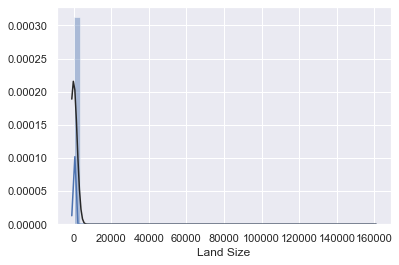

In [449]:
sns.distplot(df['Land Size'], fit=norm)

In [450]:
df[df['Land Size'] < 30].shape

(7361, 6)

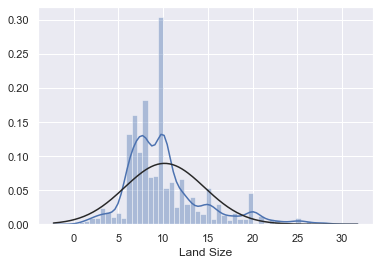

In [451]:
sns.distplot(df[df['Land Size'] < 30]['Land Size'], fit=norm)

In [452]:
df[df['Land Size'] < 30]['Land Size'].shape

(7361,)

In [453]:
df = df.drop(df[df['Land Size'] > 30].index, axis=0)

In [454]:
df.shape

(7385, 6)

In [455]:
i#no useful
# df= df.drop(df[df['Price'] < 5e6].index, axis=0)

9

<h2>House Size

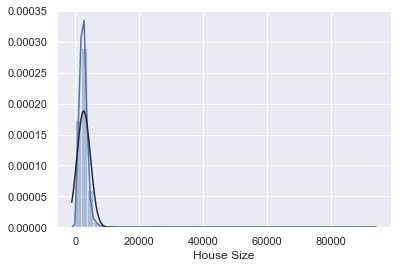

In [456]:
sns.distplot(df['House Size'], fit=norm)

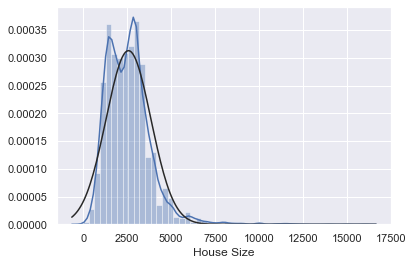

In [457]:
sns.distplot(df[df['House Size'] < 20000]['House Size'], fit=norm)

In [458]:
df[df['House Size'] < 20000]['Land Size'].shape

(7370,)

In [459]:
df = df.drop(df[df['House Size'] > 20000].index, axis=0)

In [460]:
df.shape

(7371, 6)

<h1>Drop NaN rows

In [500]:
df = df.dropna()

In [501]:
df.shape

(7547, 6)

In [462]:
df.groupby('Location').count()['Price']

Location
Angoda             95
Athurugiriya      403
Avissawella        26
Battaramulla      346
Boralesgamuwa     325
Colombo 10         28
Colombo 12         11
Colombo 13         10
Colombo 14         13
Colombo 15         38
Colombo 2           2
Colombo 3          13
Colombo 4          11
Colombo 5          88
Colombo 6          46
Colombo 7          19
Colombo 8          25
Colombo 9          23
Dehiwala          313
Hanwella           17
Homagama          359
Kaduwela          106
Kesbewa           255
Kohuwala           39
Kolonnawa          74
Kottawa           470
Kotte             141
Maharagama        209
Malabe            730
Moratuwa          177
Mount Lavinia     108
Nawala             89
Nugegoda          321
Padukka            51
Pannipitiya       213
Piliyandala      1433
Rajagiriya        115
Ratmalana          80
Talawatugoda      453
Wellampitiya       95
Name: Price, dtype: int64

In [463]:
# df = df.drop(df[df['Location'] == 'Colombo 2'].index)

In [464]:
df = df.reset_index()

<h1>Encoding Location

In [465]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['Location'].apply(lambda x: str(x)).values.reshape(-1,1))
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
ohe_df = pd.DataFrame(onehot_encoded)
# # data = pd.concat([df, ohe_df], axis=1).drop(['Location'], axis=1)
df = pd.concat([df, ohe_df], axis=1)

C:\Users\Shankeerthan\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [466]:
df.head(10)

,index,Location,Price,Beds,Baths,House Size,Land Size,0,1,2,...,30,31,32,33,34,35,36,37,38,39
0,0,Piliyandala,12500000.0,4.0,2.0,1750.0,6.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,Kottawa,29500000.0,4.0,4.0,3510.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Malabe,19000000.0,4.0,3.0,2850.0,7.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Kottawa,35000000.0,7.0,4.0,1700.0,15.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Boralesgamuwa,29500000.0,5.0,4.0,3500.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,Malabe,18000000.0,4.0,4.0,4500.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,Piliyandala,16500000.0,4.0,3.0,2400.0,6.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,7,Ratmalana,4500000.0,2.0,1.0,1000.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,8,Kottawa,8900000.0,3.0,2.0,1380.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,Piliyandala,20500000.0,4.0,5.0,3500.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<h3>Persist One hot encoder, label encoder to inverse transform whenever needed

In [467]:
 with open('onehot_encoder', 'wb') as file:
      pickle.dump(onehot_encoder, file)

In [468]:
 with open('label_encoder', 'wb') as file:
      pickle.dump(label_encoder, file)

<h1>Derive New variables

In [469]:
df['h_l_ratio'] = df['House Size'].apply(lambda x: x * 0.0036730945821854912)/ df['Land Size']
df['Bed Size'] = df['House Size'] / df['Beds']
df['b_b_ratio'] = df['Beds']/ df['Baths']

In [470]:
df.head()

,index,Location,Price,Beds,Baths,House Size,Land Size,0,1,2,...,33,34,35,36,37,38,39,h_l_ratio,Bed Size,b_b_ratio
0,0,Piliyandala,12500000.0,4.0,2.0,1750.0,6.5,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.988910,437.500000,2.000000
1,1,Kottawa,29500000.0,4.0,4.0,3510.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.432507,877.500000,1.000000
2,2,Malabe,19000000.0,4.0,3.0,2850.0,7.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.395776,712.500000,1.333333
3,3,Kottawa,35000000.0,7.0,4.0,1700.0,15.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.416284,242.857143,1.750000
4,4,Boralesgamuwa,29500000.0,5.0,4.0,3500.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.606979,700.000000,1.250000


<h1>Split Single Story house Separately
    

In [471]:
df_single_story = df[df['h_l_ratio'] < 1.0]

In [472]:
df.describe()

,index,Price,Beds,Baths,House Size,Land Size,0,1,2,3,...,33,34,35,36,37,38,39,h_l_ratio,Bed Size,b_b_ratio
count,7370.000000,7.370000e+03,7370.000000,7370.000000,7370.00000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,...,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000
mean,5365.378019,2.883448e+07,3.917775,2.982361,2578.99430,10.228734,0.012890,0.054681,0.003528,0.046947,...,0.006920,0.028901,0.194437,0.015604,0.010855,0.061465,0.012890,1.022527,658.927239,1.479272
std,3496.196381,3.431698e+07,1.243584,1.257665,1290.17392,4.592367,0.112808,0.227372,0.059295,0.211540,...,0.082904,0.167540,0.395793,0.123945,0.103626,0.240198,0.112808,0.549473,289.954297,0.602420
min,0.000000,8.500000e+04,1.000000,1.000000,174.24000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088154,66.666667,0.500000
25%,2412.250000,1.350000e+07,3.000000,2.000000,1600.00000,7.300000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.642792,500.000000,1.000000
50%,4939.500000,2.150000e+07,4.000000,3.000000,2500.00000,9.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.979492,625.000000,1.333333
75%,7946.750000,3.200000e+07,5.000000,4.000000,3194.25000,11.800000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.303356,750.000000,1.666667
max,12707.000000,9.500000e+08,10.000000,10.000000,20000.00000,30.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.692378,11000.000000,7.000000


In [473]:
df_single_story.describe()

,index,Price,Beds,Baths,House Size,Land Size,0,1,2,3,...,33,34,35,36,37,38,39,h_l_ratio,Bed Size,b_b_ratio
count,3785.000000,3.785000e+03,3785.000000,3785.000000,3785.000000,3785.000000,3785.000000,3785.000000,3785.000000,3785.000000,...,3785.000000,3785.000000,3785.000000,3785.000000,3785.000000,3785.000000,3785.000000,3785.000000,3785.000000,3785.000000
mean,5390.371466,2.409079e+07,3.516777,2.438045,1990.659083,11.756637,0.020608,0.073712,0.006869,0.033554,...,0.013210,0.027741,0.192338,0.011625,0.011361,0.038573,0.012417,0.652307,574.665561,1.650061
std,3544.596611,3.281896e+07,1.228750,1.147859,942.070865,5.161485,0.142086,0.261336,0.082607,0.180101,...,0.114188,0.164252,0.394189,0.107204,0.105993,0.192601,0.110754,0.201858,217.536282,0.693098
min,0.000000,8.500000e+04,1.000000,1.000000,174.240000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088154,66.666667,0.500000
25%,2306.000000,1.000000e+07,3.000000,2.000000,1350.000000,8.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.506634,442.400000,1.000000
50%,4979.000000,1.500000e+07,3.000000,2.000000,1750.000000,10.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.653352,533.333333,1.500000
75%,8048.000000,2.650000e+07,4.000000,3.000000,2500.000000,14.400000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.821045,666.666667,2.000000
max,12707.000000,9.500000e+08,10.000000,10.000000,8000.000000,30.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999998,4000.000000,7.000000


<h1>Relationship between variables

<h2>Correlation Matrix Whole data set

In [474]:
cols = ['Price', 'Beds', 'Baths', 'House Size', 'Land Size', 'h_l_ratio', 'Bed Size', 'b_b_ratio']

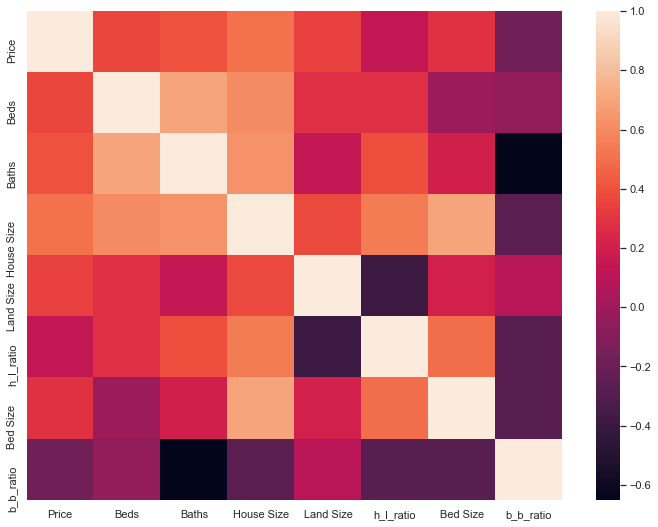

In [475]:
corr_mat = df[cols].corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corr_mat)

<h2>Correlation Matrix Single Story houses

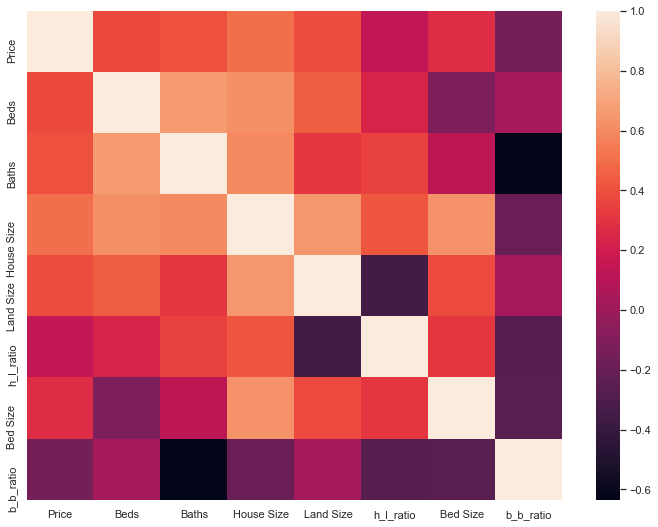

In [476]:
corr_mat = df_single_story[cols].corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corr_mat)

<h2> Pair plot Whole dataset

C:\Users\Shankeerthan\Anaconda3\envs\learn-ml\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


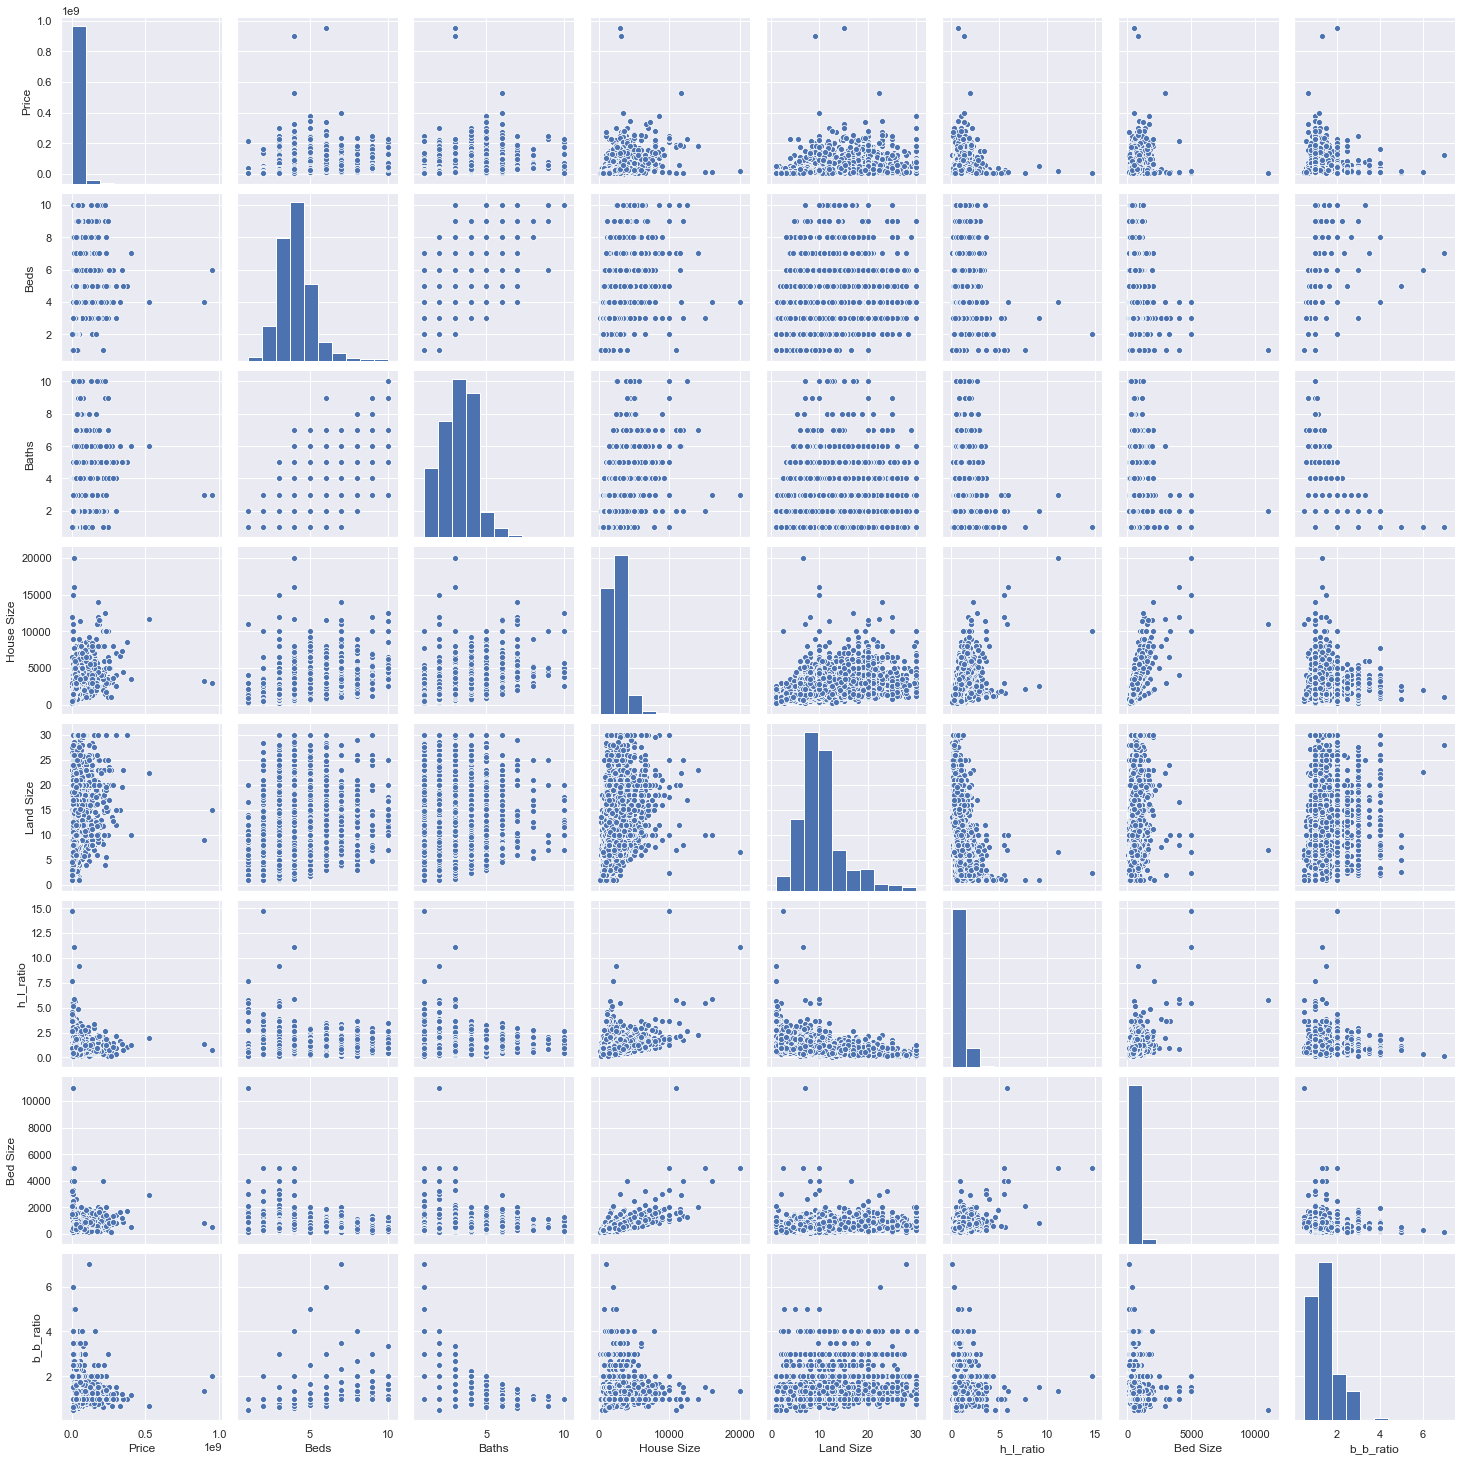

In [477]:
sns.set()
sns.pairplot(df[cols], size = 2.5)
plt.show();

<h2>Pair plot single house dataset

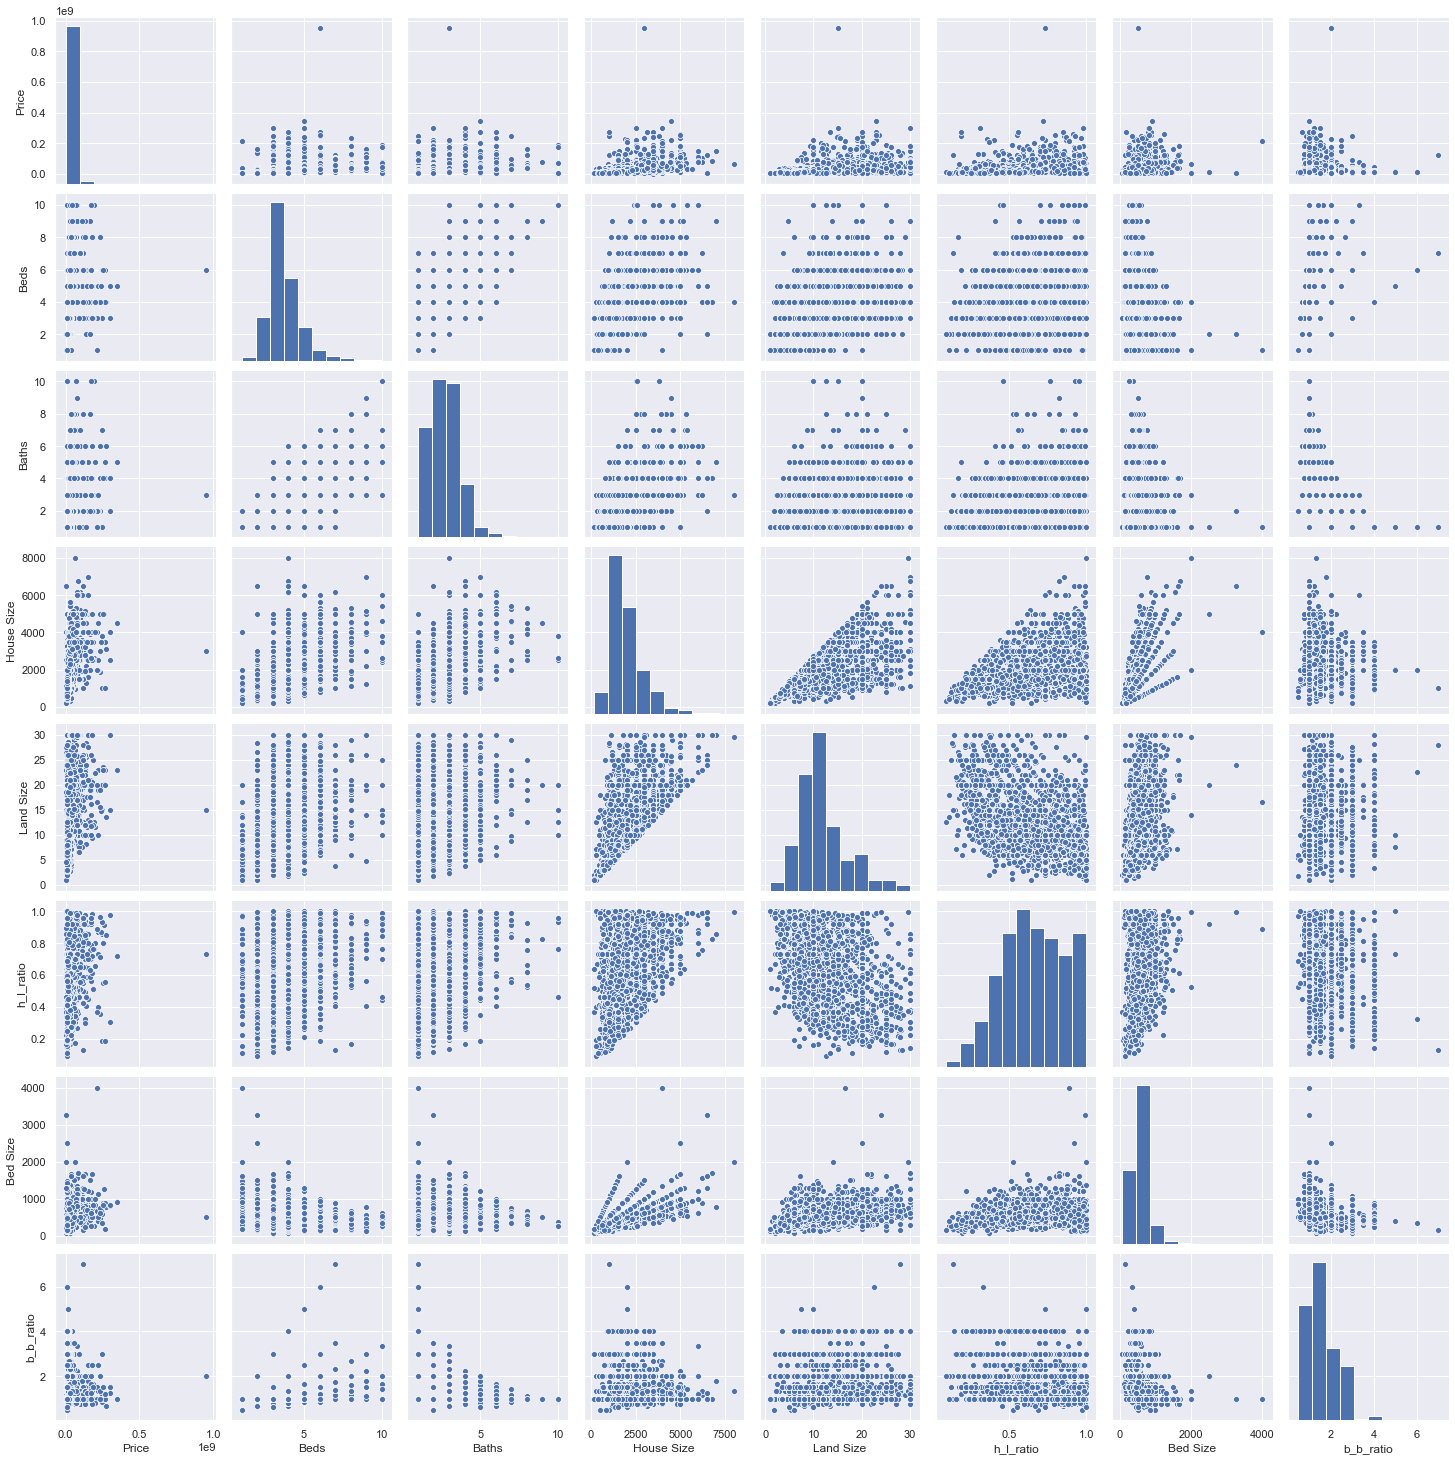

In [478]:
sns.set()
sns.pairplot(df_single_story[cols], size = 2.5)
plt.show();

<h1>Linear Regression

In [479]:
from sklearn.linear_model import LinearRegression 

In [480]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['Price', 'Location', 'index'], axis=1), df['Price'],
   test_size=0.33)
lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(X_train, Y_train)
Y_pred = lr_model.predict(X_test)
r2 = lr_model.score(X_test, Y_test)
lr_rmse= np.sqrt(((Y_pred - Y_test) ** 2).mean())
mape = (np.abs((Y_test - Y_pred)// Y_test).sum()) * (100/len(Y_test))
print('r2 : ' + str(r2))
print('rmse : ' + str(lr_rmse))
print('mape : ' + str(mape))

r2 : 0.5273617933042218
rmse : 24673689.44453527
mape : 97.61611179613645


<h2>Linear Regression with Single Story Houses

In [481]:
X_train, X_test, Y_train, Y_test = train_test_split(df_single_story.drop(['Price', 'Location', 'index'], axis=1), df_single_story['Price'],
   test_size=0.33)
lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(X_train, Y_train)
Y_pred = lr_model.predict(X_test)
r2 = lr_model.score(X_test, Y_test)
lr_rmse= np.sqrt(((Y_pred - Y_test) ** 2).mean())
mape = (np.abs((Y_test - Y_pred)// Y_test).sum()) * (100/len(Y_test))
print('r2 : ' + str(r2))
print('rmse : ' + str(lr_rmse))
print('mape : ' + str(mape))

r2 : 0.6040490312881739
rmse : 19958929.58319001
mape : 119.36


<h1> Important feature sets

In [482]:
features_important =[
    [0,            1,            2,
                  3,            4,            5,            6,            7,
                  8,            9,           10,           11,           12,
                 13,           14,           15,           16,           17,
                 18,           19,           20,           21,           22,
                 23,           24,           25,           26,           27,
                 28,           29,           30,           31,           32,
                 33,           34,           35,           36,           37,
                 38,           39, 'Beds', 'Baths', 'Land Size'],
    [0,            1,            2,
                  3,            4,            5,            6,            7,
                  8,            9,           10,           11,           12,
                 13,           14,           15,           16,           17,
                 18,           19,           20,           21,           22,
                 23,           24,           25,           26,           27,
                 28,           29,           30,           31,           32,
                 33,           34,           35,           36,           37,
                 38,           39, 'Beds', 'Baths','House Size', 'h_l_ratio'],
    [0,            1,            2,
                  3,            4,            5,            6,            7,
                  8,            9,           10,           11,           12,
                 13,           14,           15,           16,           17,
                 18,           19,           20,           21,           22,
                 23,           24,           25,           26,           27,
                 28,           29,           30,           31,           32,
                 33,           34,           35,           36,           37,
                 38,           39, 'Beds', 'Baths', 'Land Size', 'h_l_ratio'],
    [0,            1,            2,
                  3,            4,            5,            6,            7,
                  8,            9,           10,           11,           12,
                 13,           14,           15,           16,           17,
                 18,           19,           20,           21,           22,
                 23,           24,           25,           26,           27,
                 28,           29,           30,           31,           32,
                 33,           34,           35,           36,           37,
                 38,           39, 'Beds', 'Baths', 'Land Size', 'Bed Size'],
    [0,            1,            2,
                  3,            4,            5,            6,            7,
                  8,            9,           10,           11,           12,
                 13,           14,           15,           16,           17,
                 18,           19,           20,           21,           22,
                 23,           24,           25,           26,           27,
                 28,           29,           30,           31,           32,
                 33,           34,           35,           36,           37,
                 38,           39, 'Beds', 'House Size', 'Land Size', 'b_b_ratio'],
    [0,            1,            2,
                  3,            4,            5,            6,            7,
                  8,            9,           10,           11,           12,
                 13,           14,           15,           16,           17,
                 18,           19,           20,           21,           22,
                 23,           24,           25,           26,           27,
                 28,           29,           30,           31,           32,
                 33,           34,           35,           36,           37,
                 38,           39, 'Beds', 'House Size', 'h_l_ratio', 'b_b_ratio'],
    [0,            1,            2,
                  3,            4,            5,            6,            7,
                  8,            9,           10,           11,           12,
                 13,           14,           15,           16,           17,
                 18,           19,           20,           21,           22,
                 23,           24,           25,           26,           27,
                 28,           29,           30,           31,           32,
                 33,           34,           35,           36,           37,
                 38,           39, 'Beds', 'Land Size', 'h_l_ratio', 'b_b_ratio'],
    [0,            1,            2,
                  3,            4,            5,            6,            7,
                  8,            9,           10,           11,           12,
                 13,           14,           15,           16,           17,
                 18,           19,           20,           21,           22,
                 23,           24,           25,           26,           27,
                 28,           29,           30,           31,           32,
                 33,           34,           35,           36,           37,
                 38,           39, 'Beds', 'Baths', 'House Size', 'h_l_ratio', 'b_b_ratio'],
    [0,            1,            2,
                  3,            4,            5,            6,            7,
                  8,            9,           10,           11,           12,
                 13,           14,           15,           16,           17,
                 18,           19,           20,           21,           22,
                 23,           24,           25,           26,           27,
                 28,           29,           30,           31,           32,
                 33,           34,           35,           36,           37,
                 38,           39, 'Beds', 'Baths', 'Land Size', 'h_l_ratio', 'b_b_ratio'],
    [0,            1,            2,
                  3,            4,            5,            6,            7,
                  8,            9,           10,           11,           12,
                 13,           14,           15,           16,           17,
                 18,           19,           20,           21,           22,
                 23,           24,           25,           26,           27,
                 28,           29,           30,           31,           32,
                 33,           34,           35,           36,           37,
                 38,           39, 'Beds', 'Baths', 'h_l_ratio', 'Bed Size', 'b_b_ratio']  
]

<h1>Randforest Regression

<h2>Whole dataset

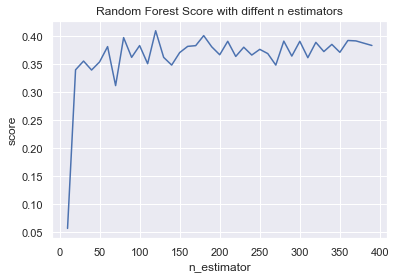

In [483]:
estimators = np.arange(10, 400, 10)
results_rf_wh_v1 = []
scores = []
X_train, X_test, Y_train, Y_test = train_test_split(df[features_important[1]], df['Price'],
   test_size=0.33)
rf_model = RandomForestRegressor(n_jobs=-1)
for n in estimators:
    rf_model.set_params(n_estimators=n)
    rf_model.fit(X_train, Y_train)
    Y_pred = rf_model.predict(X_test)
    score = rf_model.score(X_test, Y_test)
    rmse= np.sqrt(((Y_pred - Y_test) ** 2).mean())
    mape = (np.abs((Y_test - Y_pred)// Y_test).sum()) * (100/len(Y_test))
    scores.append(score)
    results_rf_wh_v1.append((score, rmse, mape))
plt.title('Random Forest Score with diffent n estimators')
plt.xlabel('n_estimator')
plt.ylabel('score')
plt.plot(estimators, scores )

In [484]:
print('min score: ' + str(min([val[0] for val in results_rf_wh_v1])))
print('max score: ' + str(max([val[0] for val in results_rf_wh_v1])))
print('min rmse: ' + str(min([val[1] for val in results_rf_wh_v1])))
print('max rmse: ' + str(max([val[1] for val in results_rf_wh_v1])))
print('min mape: ' + str(min([val[2] for val in results_rf_wh_v1])))
print('max mape: ' + str(max([val[2] for val in results_rf_wh_v1])))

min score: 0.0568046936624218
max score: 0.409894743919732
min rmse: 24108677.41127902
max rmse: 30479613.800013643
min mape: 73.20180846691328
max mape: 75.9967118783395


<h2>Single Story Houses

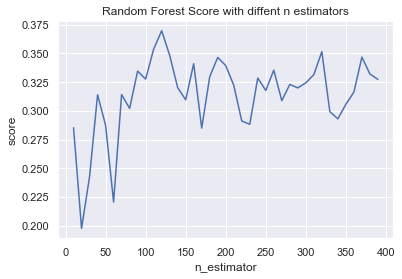

In [485]:
estimators = np.arange(10, 400, 10)
results_rf_sin_v1 = []
scores = []
X_train, X_test, Y_train, Y_test = train_test_split(df_single_story[features_important[1]],df_single_story['Price'],test_size=0.33)
rf_model = RandomForestRegressor(n_jobs=-1)
for n in estimators:
    rf_model.set_params(n_estimators=n)
    rf_model.fit(X_train, Y_train)
    Y_pred = rf_model.predict(X_test)
    score = rf_model.score(X_test, Y_test)
    rmse= np.sqrt(((Y_pred - Y_test) ** 2).mean())
    mape = (np.abs((Y_test - Y_pred)// Y_test).sum()) * (100/len(Y_test))
    scores.append(score)
    results_rf_sin_v1.append((score, rmse, mape))
plt.title('Random Forest Score with diffent n estimators')
plt.xlabel('n_estimator')
plt.ylabel('score')
plt.plot(estimators, scores )

In [486]:
print('min score: ' + str(min([val[0] for val in results_rf_sin_v1])))
print('max score: ' + str(max([val[0] for val in results_rf_sin_v1])))
print('min rmse: ' + str(min([val[1] for val in results_rf_sin_v1])))
print('max rmse: ' + str(max([val[1] for val in results_rf_sin_v1])))
print('min mape: ' + str(min([val[2] for val in results_rf_sin_v1])))
print('max mape: ' + str(max([val[2] for val in results_rf_sin_v1])))

min score: 0.19768696056746604
max score: 0.3697763027338541
min rmse: 21537666.14745029
max rmse: 24300947.1768971
min mape: 68.16
max mape: 71.60000000000001


<h1>Clustering to detect outliers

In [487]:
def cluster(df_to_cluster, n_cluster):
    km = KMeans(
        n_clusters=n_cluster
    )
    km.fit(df_to_cluster)
    y_km = km.predict(df_to_cluster)
    return y_km

<h2>Cluster Whole data set

In [488]:
cols_cluster = [ 'House Size', "Land Size", 'h_l_ratio', 'b_b_ratio', 'Beds', 'Baths']
cols_cluster_price = ['Price', 'House Size', "Land Size", 'h_l_ratio', 'b_b_ratio', 'Beds', 'Baths']
cols_cluster_v1 = ['Price', 'House Size', 'Land Size']
cols_cluster_v2 = ['Price', 'House Size', 'Land Size', 'Beds']
cols_cluster_v3 = ['Price', 'House Size', 'Land Size', 'Baths']
cols_cluster_v4 = ['Price', 'House Size', 'Beds']
cols_cluster_v5 = ['Price', 'House Size', 'Baths']
cols_cluster_v6 = ['Price', 'Land Size', 'Beds']


In [489]:
def build_rf_model(df_house, x_cols, y_col):
    print('***************************************************************')
    estimators = np.arange(10, 400, 10)
    results = []
    scores = []
    X_train, X_test, Y_train, Y_test = train_test_split(df_house[x_cols], df_house[y_col],test_size=0.33)
    rf_model = RandomForestRegressor(n_jobs=-1)
    for n in estimators:
        rf_model.set_params(n_estimators=n)
        rf_model.fit(X_train, Y_train)
        Y_pred = rf_model.predict(X_test)
        score = rf_model.score(X_test, Y_test)
        rmse= np.sqrt(((Y_pred - Y_test) ** 2).mean())
        mape = (np.abs((Y_test - Y_pred)// Y_test).sum()) * (100/len(Y_test))
        scores.append(score)
        results.append((score, rmse, mape))
    plt.title('Random Forest Score with diffent n estimators')
    plt.xlabel('n_estimator')
    plt.ylabel('score')
    plt.plot(estimators, scores )
    print('min score: ' + str(min([val[0] for val in results])))
    print('max score: ' + str(max([val[0] for val in results])))
    print('min rmse: ' + str(min([val[1] for val in results])))
    print('max rmse: ' + str(max([val[1] for val in results])))
    print('min mape: ' + str(min([val[2] for val in results])))
    print('max mape: ' + str(max([val[2] for val in results])))
    print('***************************************************************')

In [490]:
def find_best_cluster(df_house, cols_list,rf_x_cols, rf_y_col, n_cluster_max=3, n_cluster_min=2):
    for cols in cols_list:
        for n in range(n_cluster_min, n_cluster_max + 1):
            y_km = cluster(df_house[cols], n)
            print('-----------------------------------------------')
            print(str(cols))
            print('-----------------------------------------------')
            print('Size of clusters : ' + str([ df_house[y_km == i].shape[0] for i in range(n)]))
            print('-----------------------------------------------')
            for i in range(0, n): 
                if (df_house[y_km == i].shape[0] > 50):
                    build_rf_model(df_house[y_km == i],
                          rf_x_cols,
                          rf_y_col)
                else:
                    print('small cluster ignored')
            

In [491]:
cols_list_for_cluster = [
    cols_cluster,
    cols_cluster_price,
    cols_cluster_v1,
    cols_cluster_v2,
    cols_cluster_v3,
    cols_cluster_v4,
    cols_cluster_v5,
    cols_cluster_v6
]

-----------------------------------------------
['House Size', 'Land Size', 'h_l_ratio', 'b_b_ratio', 'Beds', 'Baths']
-----------------------------------------------
Size of clusters : [4211, 3159]
-----------------------------------------------
***************************************************************
min score: 0.18784253765660774
max score: 0.28961251642324026
min rmse: 16460573.039007632
max rmse: 17600192.554617092
min mape: 63.884892086330936
max mape: 68.63309352517986
***************************************************************
***************************************************************
min score: 0.34120141192324327
max score: 0.5650316179555468
min rmse: 27299517.566340737
max rmse: 33597151.48992225
min mape: 62.70373921380633
max mape: 66.44295302013423
***************************************************************
-----------------------------------------------
['House Size', 'Land Size', 'h_l_ratio', 'b_b_ratio', 'Beds', 'Baths']
---------------------------

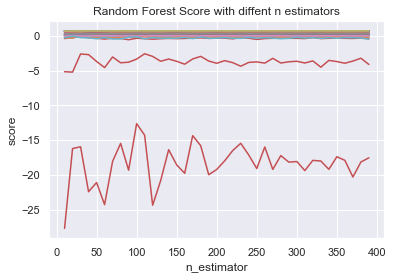

In [492]:
find_best_cluster(df, cols_list_for_cluster, features_important[2], 'Price', 3)

<h1> 10 trials to confirm best cluster

##############################################################################
1 of 10
-----------------------------------------------
['House Size', 'Beds', 'Price']
-----------------------------------------------
Size of clusters : [6530, 723, 117]
-----------------------------------------------
***************************************************************
min score: 0.690993954984873
max score: 0.7134543329279507
min rmse: 5513516.316527425
max rmse: 5725523.86231436
min mape: 52.62180974477958
max mape: 55.545243619489554
***************************************************************
***************************************************************
min score: 0.26286799484776924
max score: 0.30567034972645535
min rmse: 19934600.012962613
max rmse: 20539851.72879728
min mape: 57.32217573221757
max mape: 62.34309623430962
***************************************************************
***************************************************************
min score: -0.5842310645628945
max 

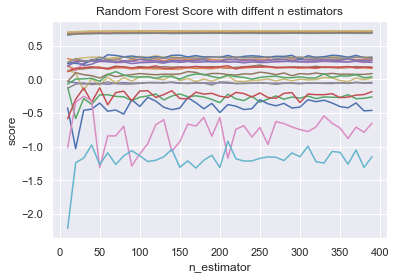

In [350]:
for i in range(10):
    print('##############################################################################')
    print(str(i+1) + " of 10")
    find_best_cluster(df, [['House Size', 'Beds', 'Price']], features_important[2], 'Price', 3, n_cluster_min=3)

<h1>The best features for clustering
    ['Price', 'House Size', 'Land Size', 'h_l_ratio', 'b_b_ratio', 'Beds', 'Baths']

In [351]:
best_cols_cluster = ['Price', 'House Size', 'Beds']
n_best_cluster = 3

In [352]:
y_km = cluster(df[best_cols_cluster], 3)

In [353]:
df[y_km == 0].shape

(6692, 50)

In [354]:
df[y_km ==0].to_csv('dataset-cleaned_v2.csv')

In [55]:
y_km_wh =  cluster(df[cols_cluster], 2)

In [56]:
df[y_km_wh==1].shape

(208, 50)

In [57]:
df[y_km_wh==0].shape

(5272, 50)

<h2> First cluster

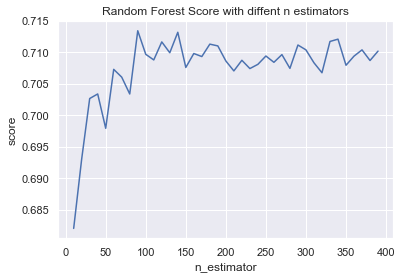

In [58]:
estimators = np.arange(10, 400, 10)
results_rf_wh_c2_v1 = []
scores = []
X_train, X_test, Y_train, Y_test = train_test_split(df[y_km_wh==0][features_important[1]], df[y_km_wh==0]['Price'],
   test_size=0.33)
rf_model = RandomForestRegressor(n_jobs=-1)
for n in estimators:
    rf_model.set_params(n_estimators=n)
    rf_model.fit(X_train, Y_train)
    Y_pred = rf_model.predict(X_test)
    score = rf_model.score(X_test, Y_test)
    rmse= np.sqrt(((Y_pred - Y_test) ** 2).mean())
    mape = (np.abs((Y_test - Y_pred)// Y_test).sum()) * (100/len(Y_test))
    scores.append(score)
    results_rf_wh_c2_v1.append((score, rmse, mape))
plt.title('Random Forest Score with diffent n estimators')
plt.xlabel('n_estimator')
plt.ylabel('score')
plt.plot(estimators, scores )

In [59]:
print('min score: ' + str(min([val[0] for val in results_rf_wh_c2_v1])))
print('max score: ' + str(max([val[0] for val in results_rf_wh_c2_v1])))
print('min rmse: ' + str(min([val[1] for val in results_rf_wh_c2_v1])))
print('max rmse: ' + str(max([val[1] for val in results_rf_wh_c2_v1])))
print('min mape: ' + str(min([val[2] for val in results_rf_wh_c2_v1])))
print('max mape: ' + str(max([val[2] for val in results_rf_wh_c2_v1])))

min score: 0.682011183839485
max score: 0.7134382801392221
min rmse: 9459968.842353083
max rmse: 9965211.979528682
min mape: 62.64367816091954
max mape: 65.63218390804597


<h2>Second Cluster

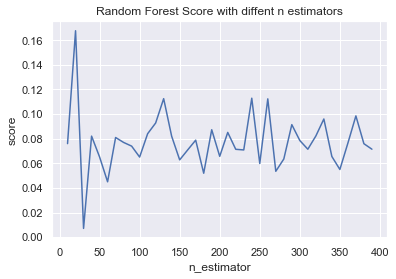

In [60]:
estimators = np.arange(10, 400, 10)
results_rf_wh_c2_v2 = []
scores = []
X_train, X_test, Y_train, Y_test = train_test_split(df[y_km_wh==1][features_important[1]], df[y_km_wh==1]['Price'],
   test_size=0.33)
rf_model = RandomForestRegressor(n_jobs=-1)
for n in estimators:
    rf_model.set_params(n_estimators=n)
    rf_model.fit(X_train, Y_train)
    Y_pred = rf_model.predict(X_test)
    score = rf_model.score(X_test, Y_test)
    rmse= np.sqrt(((Y_pred - Y_test) ** 2).mean())
    mape = (np.abs((Y_test - Y_pred)// Y_test).sum()) * (100/len(Y_test))
    scores.append(score)
    results_rf_wh_c2_v2.append((score, rmse, mape))
plt.title('Random Forest Score with diffent n estimators')
plt.xlabel('n_estimator')
plt.ylabel('score')
plt.plot(estimators, scores )

In [61]:
print('min score: ' + str(min([val[0] for val in results_rf_wh_c2_v2])))
print('max score: ' + str(max([val[0] for val in results_rf_wh_c2_v2])))
print('min rmse: ' + str(min([val[1] for val in results_rf_wh_c2_v2])))
print('max rmse: ' + str(max([val[1] for val in results_rf_wh_c2_v2])))
print('min mape: ' + str(min([val[2] for val in results_rf_wh_c2_v2])))
print('max mape: ' + str(max([val[2] for val in results_rf_wh_c2_v2])))

min score: 0.007089002302905656
max score: 0.16774327536025258
min rmse: 90884559.06776702
max rmse: 99269676.9583704
min mape: 68.1159420289855
max mape: 79.71014492753623


In [62]:
y_km_wh_c3 =  cluster(df[cols_cluster], 3)

In [63]:
df[y_km_wh_c3 ==0].shape

(5224, 50)

In [64]:
df[y_km_wh_c3 ==1].shape

(253, 50)

In [65]:
df[y_km_wh_c3 ==2].shape

(3, 50)

<h2>First Cluster

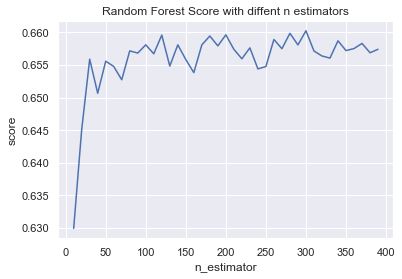

In [66]:
estimators = np.arange(10, 400, 10)
results_rf_wh_c3_v1 = []
scores = []
X_train, X_test, Y_train, Y_test = train_test_split(df[y_km_wh_c3==0][features_important[1]], df[y_km_wh_c3 ==0]['Price'],
   test_size=0.33)
rf_model = RandomForestRegressor(n_jobs=-1)
for n in estimators:
    rf_model.set_params(n_estimators=n)
    rf_model.fit(X_train, Y_train)
    Y_pred = rf_model.predict(X_test)
    score = rf_model.score(X_test, Y_test)
    rmse= np.sqrt(((Y_pred - Y_test) ** 2).mean())
    mape = (np.abs((Y_test - Y_pred)// Y_test).sum()) * (100/len(Y_test))
    scores.append(score)
    results_rf_wh_c3_v1.append((score, rmse, mape))
plt.title('Random Forest Score with diffent n estimators')
plt.xlabel('n_estimator')
plt.ylabel('score')
plt.plot(estimators, scores )

In [67]:
print('min score: ' + str(min([val[0] for val in results_rf_wh_c3_v1])))
print('max score: ' + str(max([val[0] for val in results_rf_wh_c3_v1])))
print('min rmse: ' + str(min([val[1] for val in results_rf_wh_c3_v1])))
print('max rmse: ' + str(max([val[1] for val in results_rf_wh_c3_v1])))
print('min mape: ' + str(min([val[2] for val in results_rf_wh_c3_v1])))
print('max mape: ' + str(max([val[2] for val in results_rf_wh_c3_v1])))

min score: 0.6299471107655753
max score: 0.6602528171773899
min rmse: 9700775.539884955
max rmse: 10124193.180961367
min mape: 59.74477958236659
max mape: 62.41299303944315


<h2>Second Cluster

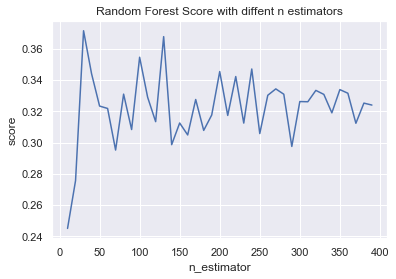

In [68]:
estimators = np.arange(10, 400, 10)
results_rf_wh_c3_v2 = []
scores = []
X_train, X_test, Y_train, Y_test = train_test_split(df[y_km_wh_c3==1][features_important[1]], df[y_km_wh_c3 ==1]['Price'],
   test_size=0.33)
rf_model = RandomForestRegressor(n_jobs=-1)
for n in estimators:
    rf_model.set_params(n_estimators=n)
    rf_model.fit(X_train, Y_train)
    Y_pred = rf_model.predict(X_test)
    score = rf_model.score(X_test, Y_test)
    rmse= np.sqrt(((Y_pred - Y_test) ** 2).mean())
    mape = (np.abs((Y_test - Y_pred)// Y_test).sum()) * (100/len(Y_test))
    scores.append(score)
    results_rf_wh_c3_v2.append((score, rmse, mape))
plt.title('Random Forest Score with diffent n estimators')
plt.xlabel('n_estimator')
plt.ylabel('score')
plt.plot(estimators, scores )

In [69]:
print('min score: ' + str(min([val[0] for val in results_rf_wh_c3_v2])))
print('max score: ' + str(max([val[0] for val in results_rf_wh_c3_v2])))
print('min rmse: ' + str(min([val[1] for val in results_rf_wh_c3_v2])))
print('max rmse: ' + str(max([val[1] for val in results_rf_wh_c3_v2])))
print('min mape: ' + str(min([val[2] for val in results_rf_wh_c3_v2])))
print('max mape: ' + str(max([val[2] for val in results_rf_wh_c3_v2])))

min score: 0.24508800903115924
max score: 0.3715825821331448
min rmse: 62616684.36373076
max rmse: 68630019.50860368
min mape: 63.095238095238095
max mape: 70.23809523809524


<h2>Third Cluster

C:\Users\Shankeerthan\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Shankeerthan\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Shankeerthan\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Shankeerthan\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Shankeerthan\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\metrics\_regression.

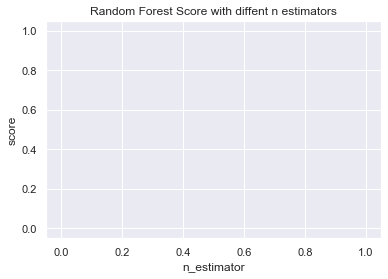

In [70]:
estimators = np.arange(10, 400, 10)
results_rf_wh_c3_v3 = []
scores = []
X_train, X_test, Y_train, Y_test = train_test_split(df[y_km_wh_c3==2][features_important[1]], df[y_km_wh_c3 ==2]['Price'],
   test_size=0.33)
rf_model = RandomForestRegressor(n_jobs=-1)
for n in estimators:
    rf_model.set_params(n_estimators=n)
    rf_model.fit(X_train, Y_train)
    Y_pred = rf_model.predict(X_test)
    score = rf_model.score(X_test, Y_test)
    rmse= np.sqrt(((Y_pred - Y_test) ** 2).mean())
    mape = (np.abs((Y_test - Y_pred)// Y_test).sum()) * (100/len(Y_test))
    scores.append(score)
    results_rf_wh_c3_v3.append((score, rmse, mape))
plt.title('Random Forest Score with diffent n estimators')
plt.xlabel('n_estimator')
plt.ylabel('score')
plt.plot(estimators, scores )

In [71]:
print('min score: ' + str(min([val[0] for val in results_rf_wh_c3_v3])))
print('max score: ' + str(max([val[0] for val in results_rf_wh_c3_v3])))
print('min rmse: ' + str(min([val[1] for val in results_rf_wh_c3_v3])))
print('max rmse: ' + str(max([val[1] for val in results_rf_wh_c3_v3])))
print('min mape: ' + str(min([val[2] for val in results_rf_wh_c3_v3])))
print('max mape: ' + str(max([val[2] for val in results_rf_wh_c3_v3])))

min score: nan
max score: nan
min rmse: 118000000.0
max rmse: 270000000.0
min mape: 100.0
max mape: 100.0


<h2>Include Price in clustering

In [72]:
y_km_wh_c2_v2 =  cluster(df[cols], 2)

NameError: name 'cols_cluster_price' is not defined

In [93]:
df[y_km_wh_c2_v2==0].shape

(5272, 50)

In [94]:
df[y_km_wh_c2_v2==1].shape

(208, 50)

<h2>First Cluster

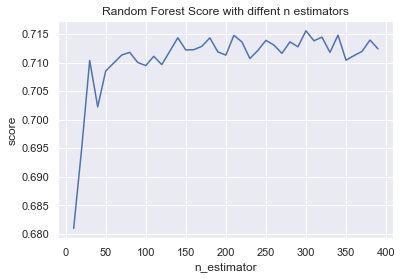

In [95]:
estimators = np.arange(10, 400, 10)
results_rf_wh_p_c2_v1 = []
scores = []
X_train, X_test, Y_train, Y_test = train_test_split(df[y_km_wh_c2_v2==0][features_important[1]], df[y_km_wh_c2_v2 ==0]['Price'],
   test_size=0.33)
rf_model = RandomForestRegressor(n_jobs=-1)
for n in estimators:
    rf_model.set_params(n_estimators=n)
    rf_model.fit(X_train, Y_train)
    Y_pred = rf_model.predict(X_test)
    score = rf_model.score(X_test, Y_test)
    rmse= np.sqrt(((Y_pred - Y_test) ** 2).mean())
    mape = (np.abs((Y_test - Y_pred)// Y_test).sum()) * (100/len(Y_test))
    scores.append(score)
    results_rf_wh_p_c2_v1.append((score, rmse, mape))
plt.title('Random Forest Score with diffent n estimators')
plt.xlabel('n_estimator')
plt.ylabel('score')
plt.plot(estimators, scores )

In [96]:
print('min score: ' + str(min([val[0] for val in results_rf_wh_p_c2_v1])))
print('max score: ' + str(max([val[0] for val in results_rf_wh_p_c2_v1])))
print('min rmse: ' + str(min([val[1] for val in results_rf_wh_p_c2_v1])))
print('max rmse: ' + str(max([val[1] for val in results_rf_wh_p_c2_v1])))
print('min mape: ' + str(min([val[2] for val in results_rf_wh_p_c2_v1])))
print('max mape: ' + str(max([val[2] for val in results_rf_wh_p_c2_v1])))

min score: 0.680928305812099
max score: 0.7155857625629543
min rmse: 9472915.399139607
max rmse: 10033492.524856698
min mape: 82.1264367816092
max mape: 87.64367816091954


<h2>Second Cluster

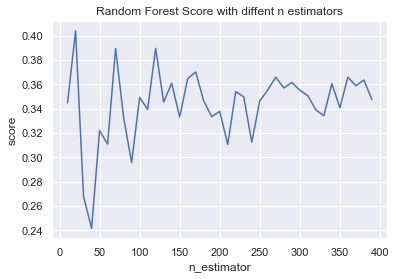

In [97]:
estimators = np.arange(10, 400, 10)
results_rf_wh_p_c2_v2 = []
scores = []
X_train, X_test, Y_train, Y_test = train_test_split(df[y_km_wh_c2_v2==1][features_important[1]], df[y_km_wh_c2_v2 ==1]['Price'],
   test_size=0.33)
rf_model = RandomForestRegressor(n_jobs=-1)
for n in estimators:
    rf_model.set_params(n_estimators=n)
    rf_model.fit(X_train, Y_train)
    Y_pred = rf_model.predict(X_test)
    score = rf_model.score(X_test, Y_test)
    rmse= np.sqrt(((Y_pred - Y_test) ** 2).mean())
    mape = (np.abs((Y_test - Y_pred)// Y_test).sum()) * (100/len(Y_test))
    scores.append(score)
    results_rf_wh_p_c2_v2.append((score, rmse, mape))
plt.title('Random Forest Score with diffent n estimators')
plt.xlabel('n_estimator')
plt.ylabel('score')
plt.plot(estimators, scores )

In [98]:
print('min score: ' + str(min([val[0] for val in results_rf_wh_p_c2_v2])))
print('max score: ' + str(max([val[0] for val in results_rf_wh_p_c2_v2])))
print('min rmse: ' + str(min([val[1] for val in results_rf_wh_p_c2_v2])))
print('max rmse: ' + str(max([val[1] for val in results_rf_wh_p_c2_v2])))
print('min mape: ' + str(min([val[2] for val in results_rf_wh_p_c2_v2])))
print('max mape: ' + str(max([val[2] for val in results_rf_wh_p_c2_v2])))

min score: 0.2415618036209387
max score: 0.40411713440740843
min rmse: 63309801.76796762
max rmse: 71425058.25388281
min mape: 55.072463768115945
max mape: 63.768115942028984


<h2>With 3 cluster

In [99]:
y_km_wh_c3_v2 =  cluster(df.drop(['index', 'Location'], axis=1), 3)

In [100]:
df[y_km_wh_c3_v2 ==0].shape

(5224, 50)

In [101]:
df[y_km_wh_c3_v2 == 1].shape

(253, 50)

In [102]:
df[y_km_wh_c3_v2==2].shape

(3, 50)

<h2>First Cluster

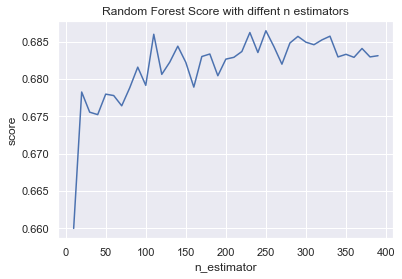

In [103]:
estimators = np.arange(10, 400, 10)
results_rf_wh_p_c3_v1 = []
scores = []
X_train, X_test, Y_train, Y_test = train_test_split(df[y_km_wh_c3_v2==0][features_important[1]], df[y_km_wh_c3_v2 ==0]['Price'],
   test_size=0.33)
rf_model = RandomForestRegressor(n_jobs=-1)
for n in estimators:
    rf_model.set_params(n_estimators=n)
    rf_model.fit(X_train, Y_train)
    Y_pred = rf_model.predict(X_test)
    score = rf_model.score(X_test, Y_test)
    rmse= np.sqrt(((Y_pred - Y_test) ** 2).mean())
    mape = (np.abs((Y_test - Y_pred)// Y_test).sum()) * (100/len(Y_test))
    scores.append(score)
    results_rf_wh_p_c3_v1.append((score, rmse, mape))
plt.title('Random Forest Score with diffent n estimators')
plt.xlabel('n_estimator')
plt.ylabel('score')
plt.plot(estimators, scores )

In [104]:
print('min score: ' + str(min([val[0] for val in  results_rf_wh_p_c3_v1])))
print('max score: ' + str(max([val[0] for val in  results_rf_wh_p_c3_v1])))
print('min rmse: ' + str(min([val[1] for val in  results_rf_wh_p_c3_v1])))
print('max rmse: ' + str(max([val[1] for val in  results_rf_wh_p_c3_v1])))
print('min mape: ' + str(min([val[2] for val in  results_rf_wh_p_c3_v1])))
print('max mape: ' + str(max([val[2] for val in  results_rf_wh_p_c3_v1])))

min score: 0.6599816141044258
max score: 0.6864788197530344
min rmse: 9025982.440041523
max rmse: 9399662.109940566
min mape: 57.77262180974478
max mape: 60.092807424593964


<h2>Second Cluster

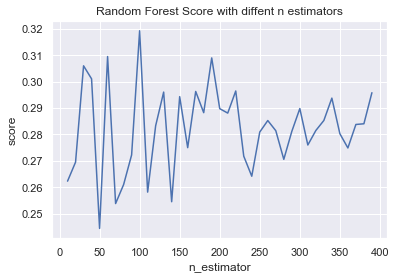

In [346]:
estimators = np.arange(10, 400, 10)
results_rf_wh_p_c3_v2 = []
scores = []
X_train, X_test, Y_train, Y_test = train_test_split(df[y_km_wh_c3_v2==1][features_important[1]], df[y_km_wh_c3_v2 ==1]['Price'],
   test_size=0.33)
rf_model = RandomForestRegressor(n_jobs=-1)
for n in estimators:
    rf_model.set_params(n_estimators=n)
    rf_model.fit(X_train, Y_train)
    Y_pred = rf_model.predict(X_test)
    score = rf_model.score(X_test, Y_test)
    rmse= np.sqrt(((Y_pred - Y_test) ** 2).mean())
    mape = (np.abs((Y_test - Y_pred)// Y_test).sum()) * (100/len(Y_test))
    scores.append(score)
    results_rf_wh_p_c3_v2.append((score, rmse, mape))
plt.title('Random Forest Score with diffent n estimators')
plt.xlabel('n_estimator')
plt.ylabel('score')
plt.plot(estimators, scores )

In [348]:
print('min score: ' + str(min([val[0] for val in  results_rf_wh_p_c3_v2])))
print('max score: ' + str(max([val[0] for val in  results_rf_wh_p_c3_v2])))
print('min rmse: ' + str(min([val[1] for val in  results_rf_wh_p_c3_v2])))
print('max rmse: ' + str(max([val[1] for val in  results_rf_wh_p_c3_v2])))
print('min mape: ' + str(min([val[2] for val in  results_rf_wh_p_c3_v2])))
print('max mape: ' + str(max([val[2] for val in  results_rf_wh_p_c3_v2])))

min score: 0.24444211418153391
max score: 0.3192755151218224
min rmse: 60956941.83888324
max rmse: 64220155.97738247
min mape: 52.38095238095238
max mape: 60.714285714285715


<h2>Visualize Clusters

Text(0.5, 1.0, 'Clustering of Data set based on House Size and Price')

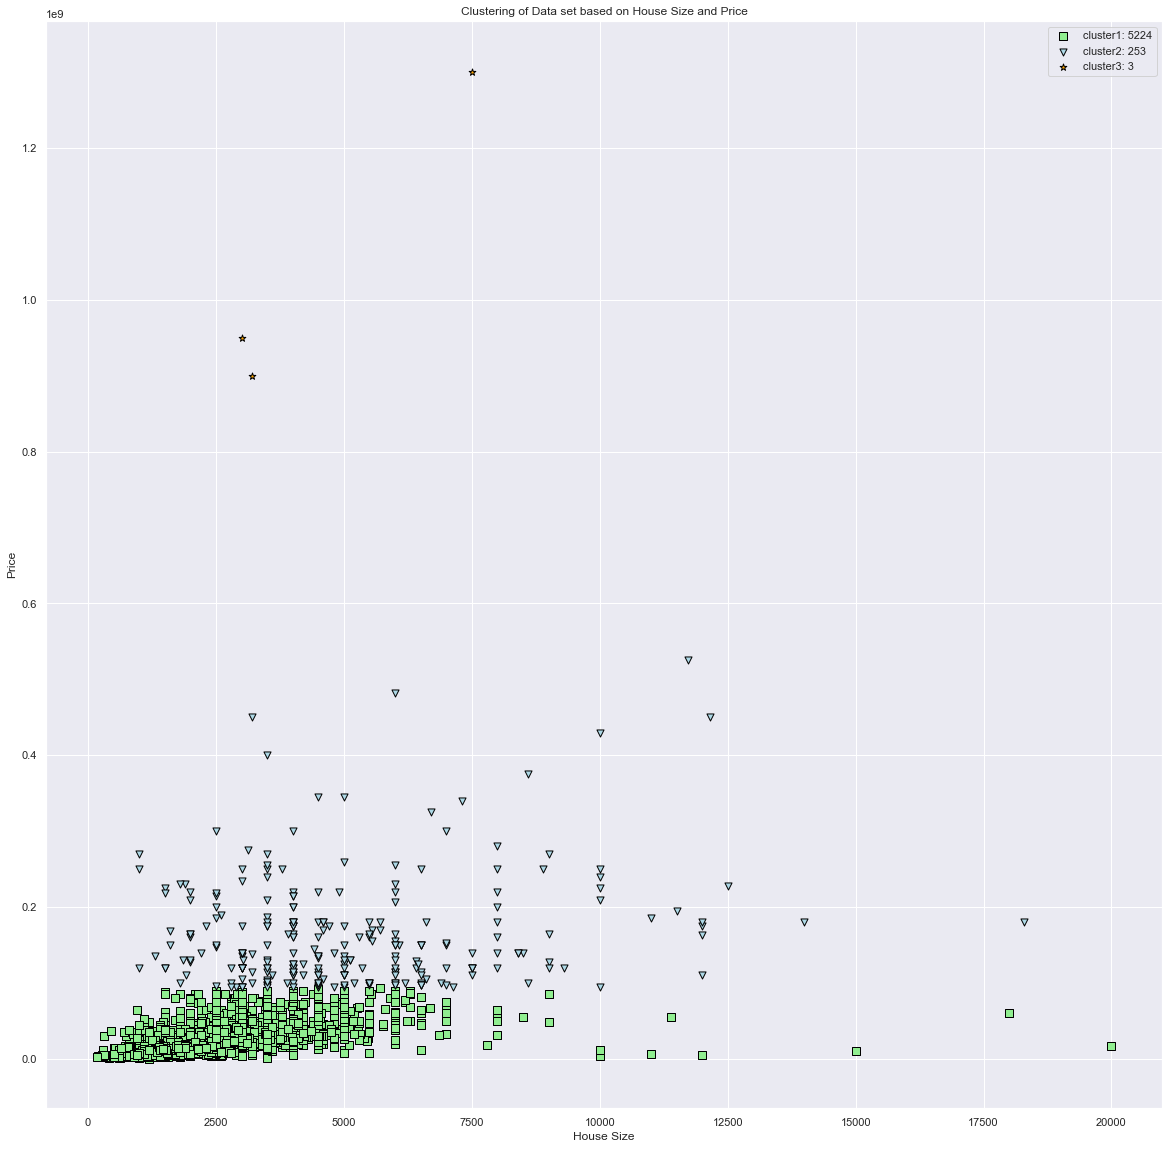

In [350]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(
    df[y_km_wh_c3_v2==0]['House Size'],
    df[y_km_wh_c3_v2==0]['Price'],
    s=50,
    c='lightgreen',
    marker='s',
    edgecolor='black',
    label='cluster 1'
)


ax.scatter(
    df[y_km_wh_c3_v2==1]['House Size'],
    df[y_km_wh_c3_v2==1]['Price'],
    s=50,
    c='lightblue',
    marker='v',
    edgecolor='black',
    label='cluster 1'
)

ax.scatter(
    df[y_km_wh_c3_v2==2]['House Size'],
    df[y_km_wh_c3_v2==2]['Price'],
    s=50,
    c='orange',
    marker='*',
    edgecolor='black',
    label='cluster 1'
)
ax.legend([
    'cluster1: ' + str (df[y_km_wh_c3_v2==0].shape[0]),
    'cluster2: ' + str( df[y_km_wh_c3_v2==1].shape[0]),
    'cluster3: ' + str( df[y_km_wh_c3_v2==2].shape[0])
          ])
ax.set_xlabel('House Size')
ax.set_ylabel('Price')
ax.set_title('Clustering of Data set based on House Size and Price')

In [351]:
df_cleaned_v1 =  df[y_km_wh_c3_v2==0]

In [353]:
df_cleaned_v1.shape

(5224, 50)

<h1>Correlation to new data set

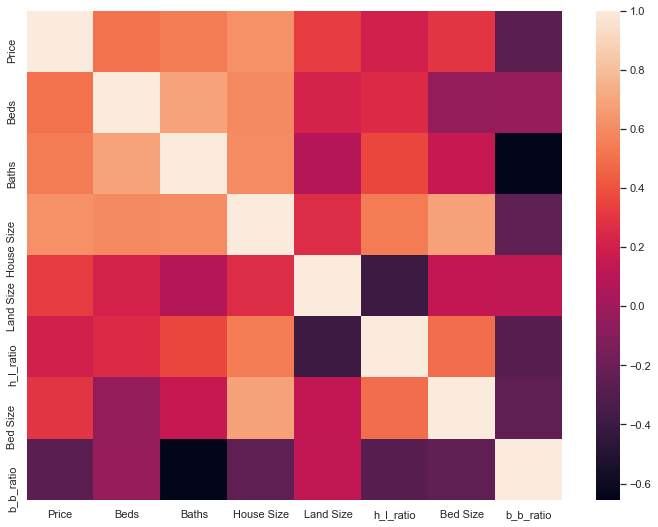

In [354]:
corr_mat = df_cleaned_v1[cols].corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corr_mat)

C:\Users\Shankeerthan\Anaconda3\envs\learn-ml\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


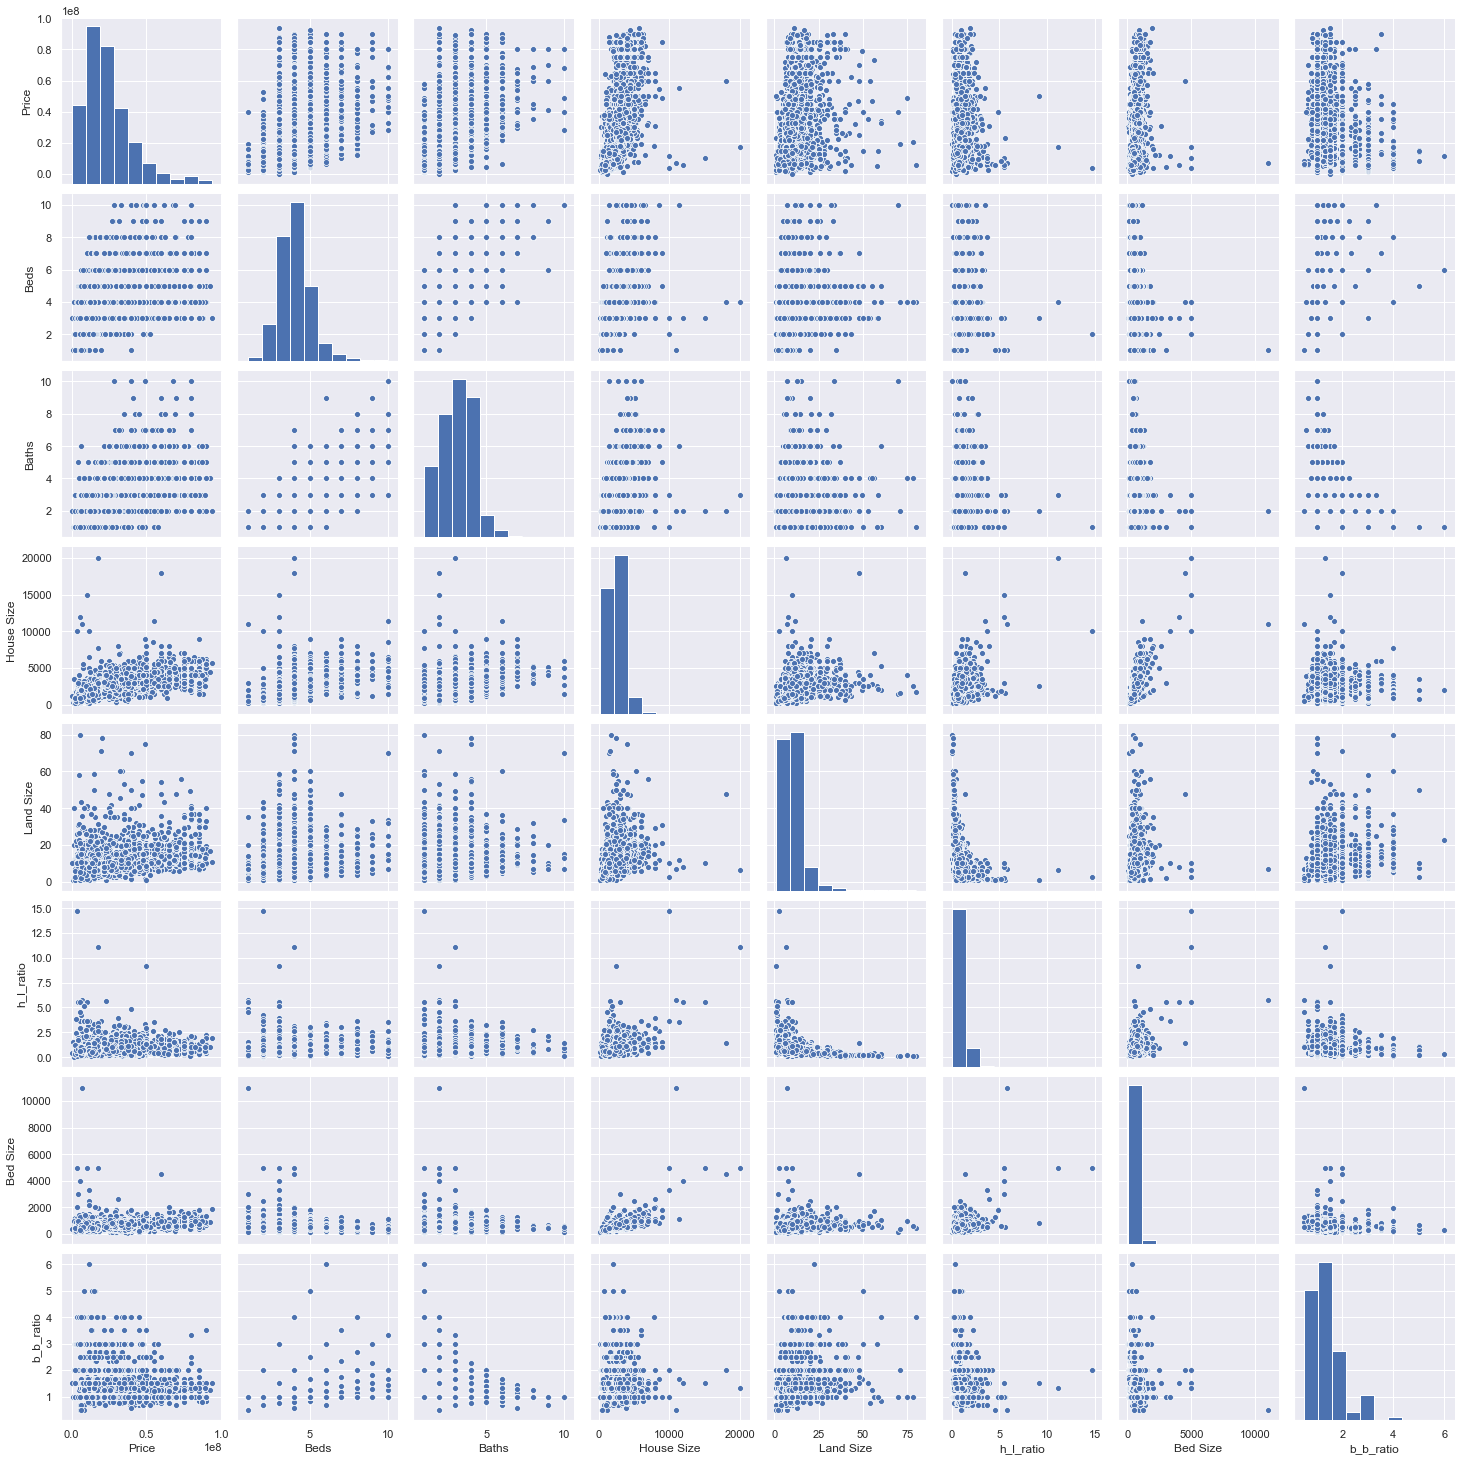

In [355]:
sns.set()
sns.pairplot(df_cleaned_v1[cols], size = 2.5)
plt.show();

In [356]:
df_cleaned_v1.to_csv('dataset-cleaned.csv')